In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [2]:
# Datascience modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Metrics
from sklearn.model_selection import cross_val_score

# Model evaluation

In [3]:
# Import models to test
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (LinearRegression, Ridge,
SGDRegressor, RANSACRegressor, HuberRegressor)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, XGBRFRegressor

In [4]:
# Load data
df = pd.read_csv('../data/ghi.csv')

# Create sets
y = df['GHI']
X = df.drop('GHI', axis=1)

df.head(1)

Elevation     Azimuth  Temperature  Pressure  Humidity  WindSpeed  \
0   2.491768  244.795929        24.24   92229.0     56.84       1.98   

   Longitud*Elevation  GHI  
0         -249.176763  0.0

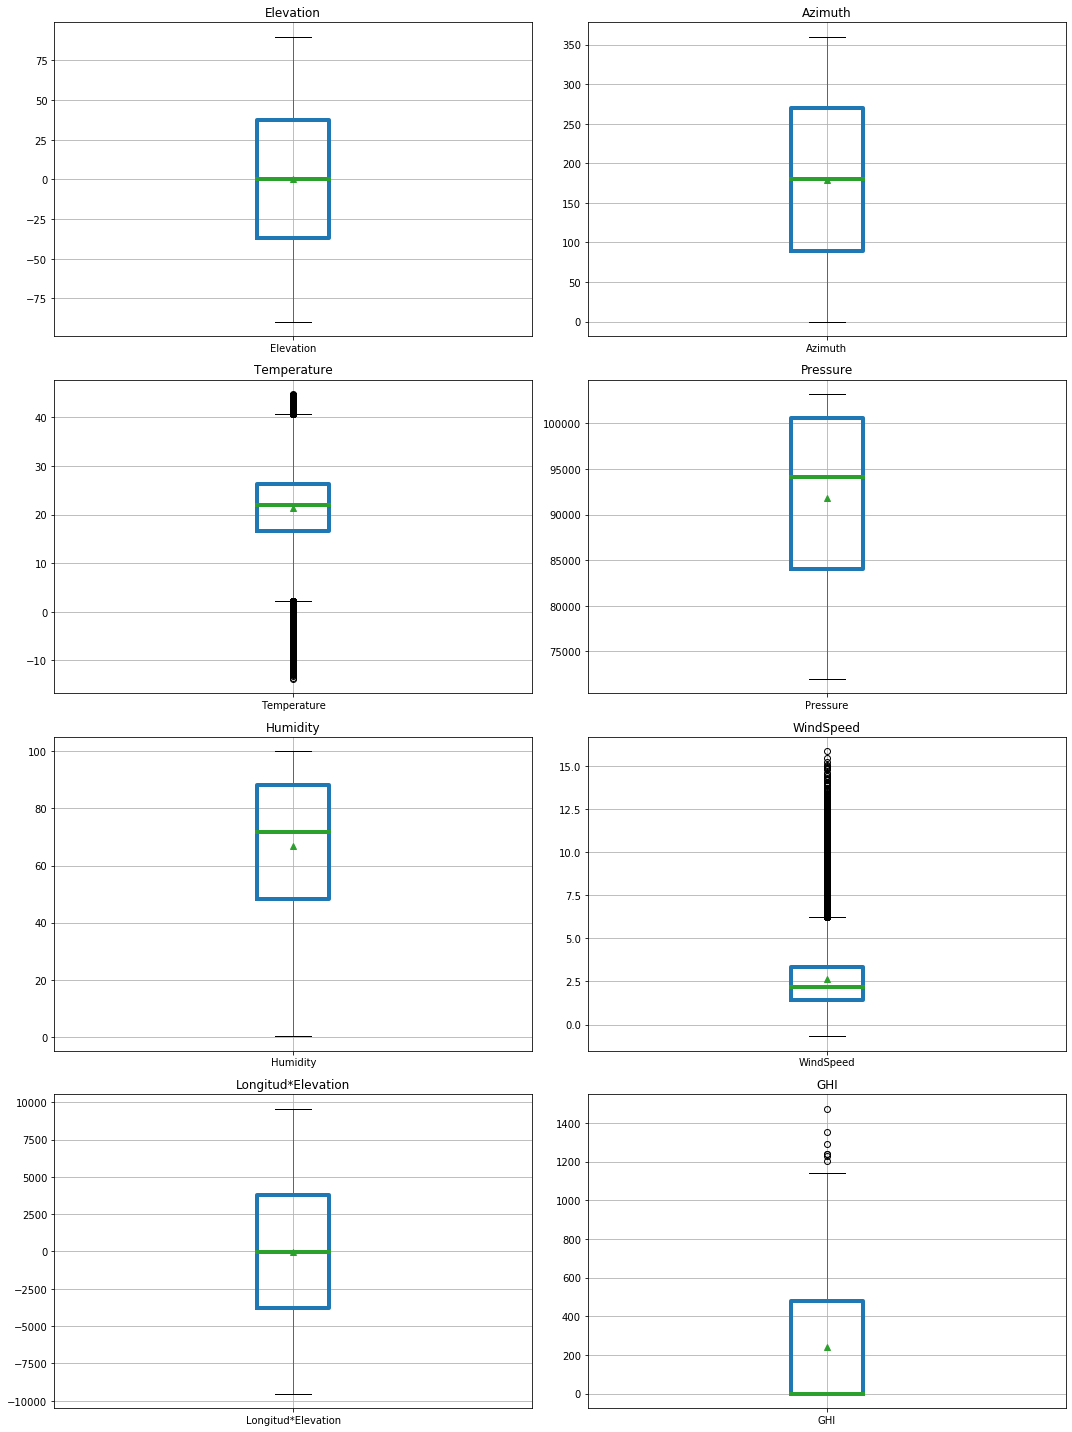

In [7]:
# Atipyc value

boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

plt.rcParams['figure.figsize'] = [15,20]
for i in range(len(df.columns)):
    plt.subplot(4, 2, i+1,)
    df.boxplot(column=df.columns[i], figsize=(10,15),
               showmeans=True, boxprops=boxprops,
               medianprops=medianprops)
               
    plt.title(df.columns[i])
    plt.tight_layout()

In [8]:
# Functions auxiliar
def get_cross_score(model, x, y, scoring='r2', cv=5):
    score = cross_val_score(model, x, y, scoring=scoring, cv=cv)
    return score.mean()

Linear = make_pipeline(PolynomialFeatures(2), LinearRegression())
RidgeReg = make_pipeline(PolynomialFeatures(2), Ridge())
SGDReg = make_pipeline(StandardScaler(),PolynomialFeatures(2),
                       SGDRegressor(loss='huber', learning_rate='optimal'))
svr = make_pipeline(StandardScaler(), SVR(gamma='auto'))

In [32]:
# Conjugate all models

models = {
    'LinearRegression' : Linear,
    'Ridge' : RidgeReg,
    'SGD' : SGDReg,
    'RASCAN' : RANSACRegressor(),
    'HuberRegressor' : HuberRegressor(),
    'KNRegressor(distance)' : KNeighborsRegressor(weights='distance'),
    'KNRegressor' : KNeighborsRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(max_depth=20),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'XGBoostRegressor' : XGBRegressor(),
    'XGBoostRFRegressor' : XGBRFRegressor(),
    'SVR' : svr
}


df_models = pd.DataFrame()


for name, reg in models.items():
    score = get_cross_score(reg, X, y)
    print('='*100)
    print('{}\nR2 score = {:0.5}'.format(name, score))

    df_models[name] = score

LinearRegression
R2 score = 0.87612
Ridge
R2 score = 0.87612
SGD
R2 score = 0.87072
RASCAN
R2 score = nan
HuberRegressor
R2 score = 0.70961
KNRegressor(distance)
R2 score = 0.86544
KNRegressor
R2 score = 0.86561
RandomForestRegressor
R2 score = 0.91177
GradientBoostingRegressor
R2 score = 0.91237
XGBoostRegressor
R2 score = 0.91057
XGBoostRFRegressor
R2 score = 0.90801


In [9]:
# Count atipyc values

dfn = df.copy()

for feature in dfn.columns:
    q75, q25 = np.percentile(dfn[feature], [75, 25])
    iqr = q75 - q25
    sup = q75 + 1.5 * iqr
    inf = q25 - 1.5 * iqr
    mask = ((dfn[feature] > sup) | (dfn[feature] < inf))
    num_atipyc = dfn[feature][mask].count()
    index = dfn[feature][mask].index
    dfn.drop(index, inplace=True)

    print('-'*50)
    print(f'{feature}\nSup:  {sup}\nInf:  {inf}\nAtipycs:  {num_atipyc}')

--------------------------------------------------
Elevation
Sup:  149.09322667775945
Inf:  -148.77674591268092
Atipycs:  0
--------------------------------------------------
Azimuth
Sup:  542.2877316306508
Inf:  -182.7575325192683
Atipycs:  0
--------------------------------------------------
Temperature
Sup:  40.730002403259284
Inf:  2.169997215270987
Atipycs:  3964
--------------------------------------------------
Pressure
Sup:  125489.0
Inf:  59129.0
Atipycs:  0
--------------------------------------------------
Humidity
Sup:  148.04499626159668
Inf:  -11.434999465942361
Atipycs:  0
--------------------------------------------------
WindSpeed
Sup:  6.2599998116493225
Inf:  -1.4999999403953546
Atipycs:  24479
--------------------------------------------------
Longitud*Elevation
Sup:  15068.262033232055
Inf:  -15031.659538151438
Atipycs:  0
--------------------------------------------------
GHI
Sup:  1180.0
Inf:  -708.0
Atipycs:  7


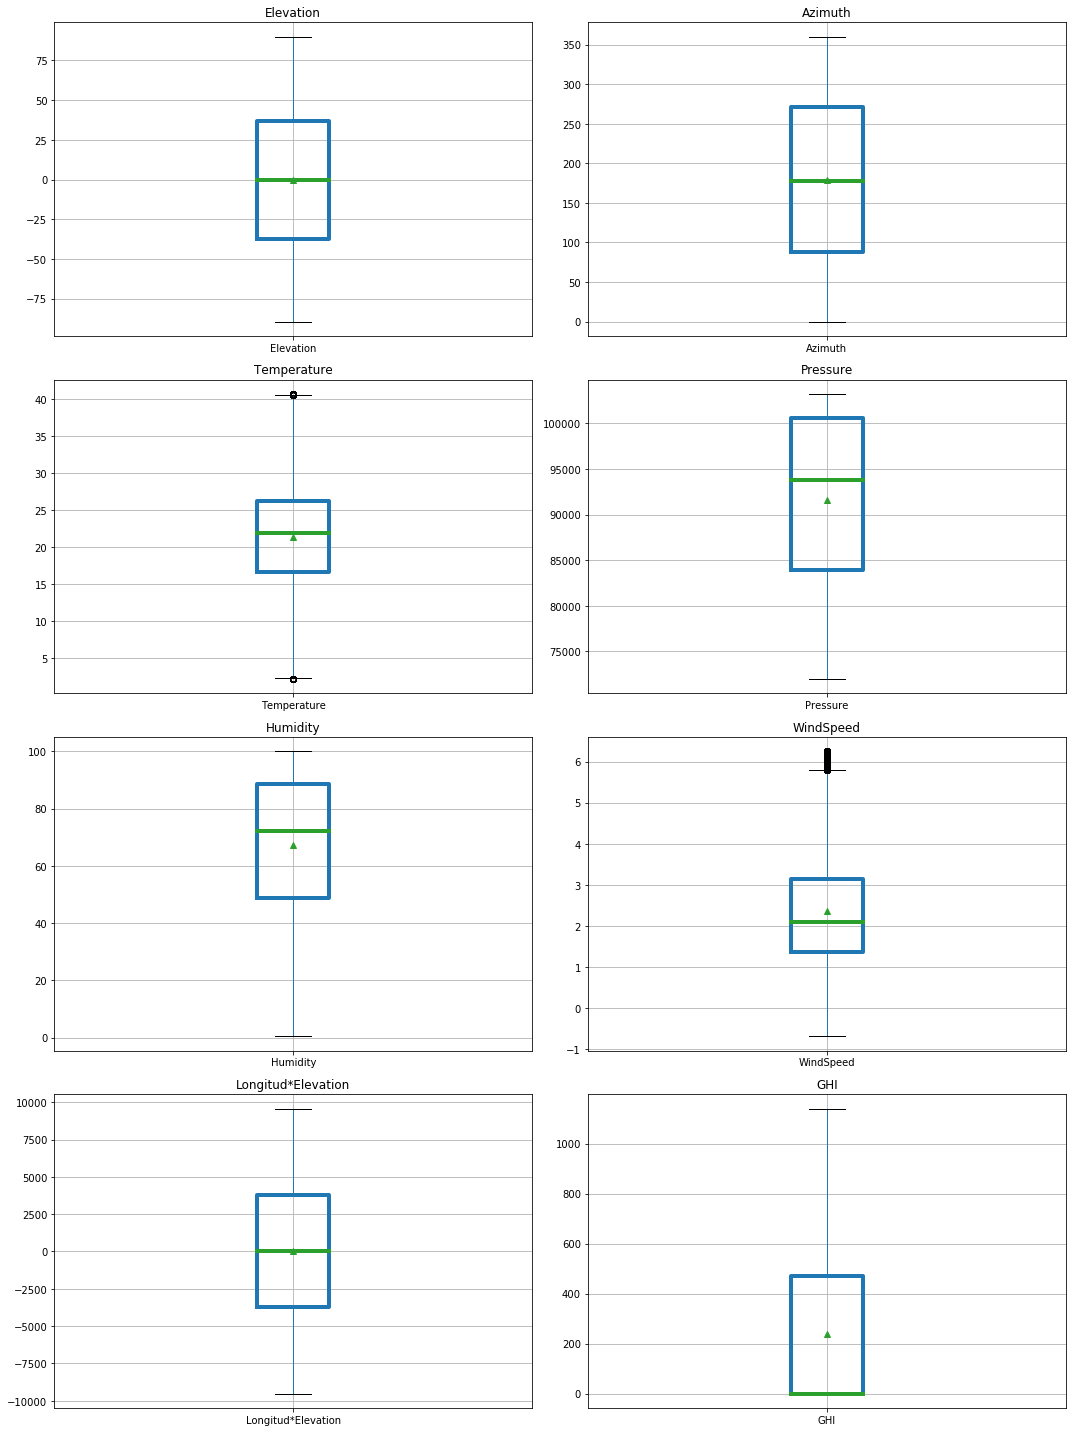

In [22]:
# Atipyc value

boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

plt.rcParams['figure.figsize'] = [15,20]
for i in range(len(dfn.columns)):
    plt.subplot(4, 2, i+1)
    dfn.boxplot(column=dfn.columns[i], figsize=(10,15),
               showmeans=True, boxprops=boxprops,
               medianprops=medianprops)
               
    plt.title(dfn.columns[i])
    plt.tight_layout()

In [11]:
# Conjugate all models
ya = dfn['GHI']
Xa = dfn.drop('GHI', axis=1)
models = {
    'Ridge' : RidgeReg,
    'RandomForestRegressor' : RandomForestRegressor(max_depth=20),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'XGBoostRegressor' : XGBRegressor(),
}


df_models = pd.DataFrame()


for name, reg in models.items():
    score = get_cross_score(reg, Xa, ya)
    print('='*100)
    print('{}\nR2 score = {:0.5}'.format(name, score))

    df_models[name] = score

Ridge
R2 score = 0.87776
RandomForestRegressor
R2 score = 0.91383
GradientBoostingRegressor
R2 score = 0.91454
XGBoostRegressor
R2 score = 0.91165


In [27]:
loc = dfn[:8760*2]

ya = loc['GHI']
Xa = loc.drop('GHI', axis=1)
models = {
    'RandomForestRegressor' : RandomForestRegressor(max_depth=20),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'XGBoostRegressor' : XGBRegressor(),
}


df_models = pd.DataFrame()


for name, reg in models.items():
    score = get_cross_score(reg, Xa, ya)
    print('='*100)
    print('{}\nR2 score = {:0.5}'.format(name, score))

    df_models[name] = score

RandomForestRegressor
R2 score = 0.94256
GradientBoostingRegressor
R2 score = 0.94504
XGBoostRegressor
R2 score = 0.93236


In [24]:
# Count atipyc values

dfnn = dfn.copy()

for feature in dfnn.columns:
    q75, q25 = np.percentile(dfnn[feature], [75, 25])
    iqr = q75 - q25
    sup = q75 + 1.5 * iqr
    inf = q25 - 1.5 * iqr
    mask = ((dfnn[feature] > sup) | (dfnn[feature] < inf))
    num_atipyc = dfnn[feature][mask].count()
    index = dfnn[feature][mask].index
    dfn.drop(index, inplace=True)

    print('-'*50)
    print(f'{feature}\nSup:  {sup}\nInf:  {inf}\nAtipycs:  {num_atipyc}')

--------------------------------------------------
Elevation
Sup:  148.08514160308175
Inf:  -148.52685193885657
Atipycs:  0
--------------------------------------------------
Azimuth
Sup:  544.1877801577418
Inf:  -185.21258031791513
Atipycs:  0
--------------------------------------------------
Temperature
Sup:  40.594996452331536
Inf:  2.2350034713745206
Atipycs:  117
--------------------------------------------------
Pressure
Sup:  125465.5
Inf:  59029.5
Atipycs:  0
--------------------------------------------------
Humidity
Sup:  148.67999839782715
Inf:  -11.239999771118164
Atipycs:  0
--------------------------------------------------
WindSpeed
Sup:  5.79500025510788
Inf:  -1.2850001454353333
Atipycs:  7832
--------------------------------------------------
Longitud*Elevation
Sup:  15068.001479676546
Inf:  -15031.182723291317
Atipycs:  0
--------------------------------------------------
GHI
Sup:  1180.0
Inf:  -708.0
Atipycs:  0


In [25]:
dfnn.shape, dfn.shape

((523367, 8), (515418, 8))

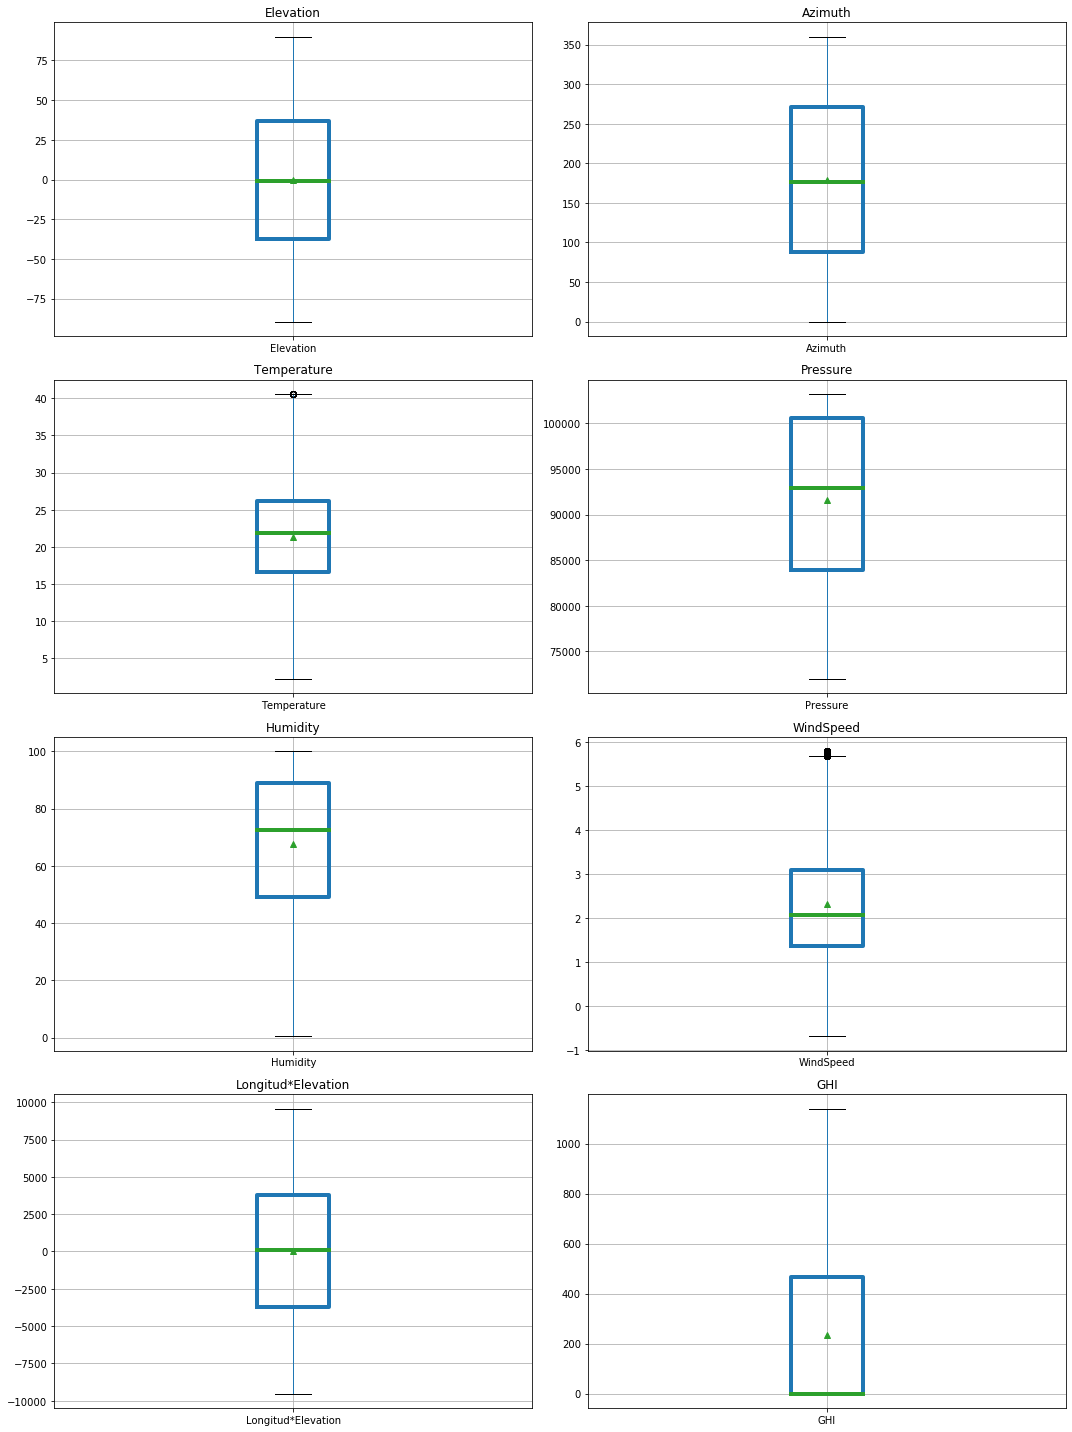

In [26]:
# Atipyc value

boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

plt.rcParams['figure.figsize'] = [15,20]
for i in range(len(dfn.columns)):
    plt.subplot(4, 2, i+1)
    dfn.boxplot(column=dfn.columns[i], figsize=(10,15),
               showmeans=True, boxprops=boxprops,
               medianprops=medianprops)
               
    plt.title(dfn.columns[i])
    plt.tight_layout()

In [28]:
dfn.to_csv('../data/GHI.csv', index=False, encoding='utf-8')

## Final conlusions
* It generates the final dataset, with the best variables and without atipyc values
* The models elected for final comparison are:
    * Random Forest Regressor
    * Gradient Boosting Regressor
    * XGBoost Regressor